In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_app = pd.read_csv("application_data.csv")
df_prev= pd.read_csv("previous_application.csv")

In [10]:
df_app.shape

(307511, 122)

### 1.1 Finding and Droping columns having 50% or more nulls


In [11]:

cols = df_app.columns[df_app.isnull().sum() >= 0.5*len(df_app.index)]
cols

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

In [12]:
df_app.drop(cols, axis =1, inplace=True)

In [13]:
df_app.shape

(307511, 81)

In [14]:
df_prev.shape

(1670214, 37)

In [15]:
cols = df_prev.columns[df_prev.isnull().sum() >= 0.5*len(df_prev.index)]
cols

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'],
      dtype='object')

In [16]:
df_prev.drop(cols, axis =1, inplace=True)

In [17]:
df_prev.shape

(1670214, 33)

#### Post removal of columns having 50% or more nulls, we have
Initial df_app -->  (307511, 122)
Final df_app -->    (307511, 81)

Initial df_prev --> (1670214, 37)
Final df_prev -->   (1670214, 33)


### 1.2 Imputing 
Columns having less than 14% Nulls

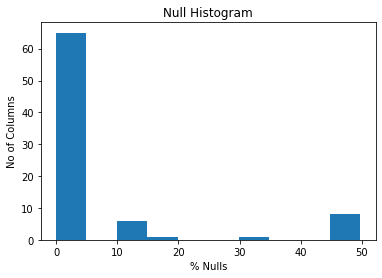

In [18]:
#Plot the Histogram of the series, to check the column distribution of Nulls
plt.hist(100*df_app.isnull().sum()/len(df_app.index))
plt.title("Null Histogram")
plt.xlabel("% Nulls")
plt.ylabel("No of Columns")
plt.show()

In [19]:
#Getting to find the null percentage columns that are 14% and below, for imputing
(100*df_app.isnull().sum()/len(df_app.index)).sort_values(ascending = False)[0:30]

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

C:\Users\shilaksh\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\shilaksh\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


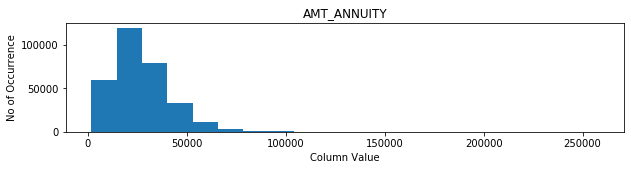

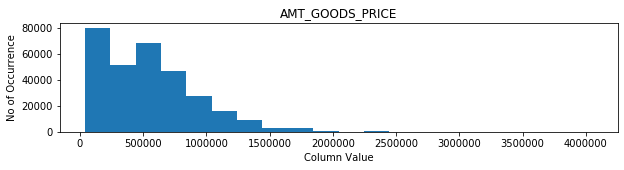

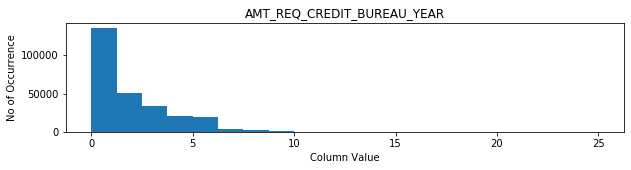

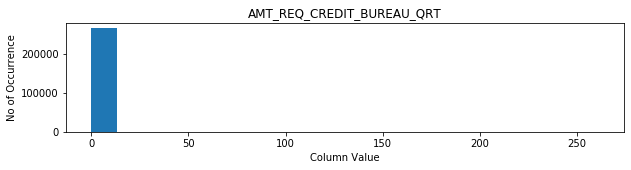

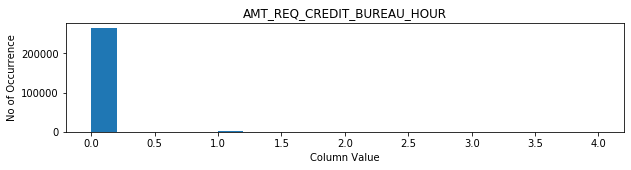

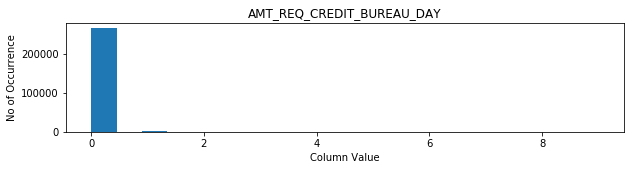

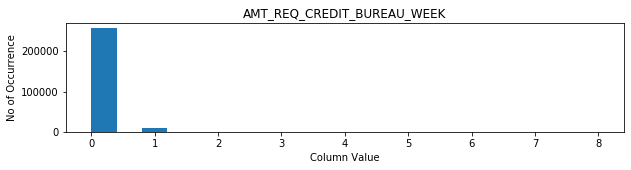

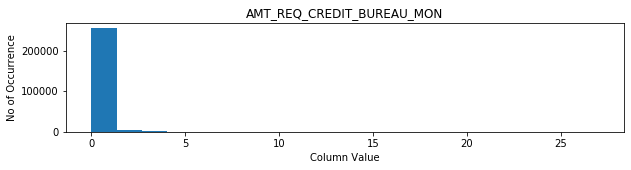

In [20]:
# Plotting the value counts of selected columns, to understand ways to impute (mode, median, graphical formula)
Col_to_impute = ["AMT_ANNUITY","AMT_GOODS_PRICE","AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON"]

for x in Col_to_impute:
    plt.figure(figsize = (10,2))
    plt.hist(df_app[x], bins =20)
    plt.title(x)
    plt.xlabel("Column Value")
    plt.ylabel("No of Occurrence")
    plt.show()

#### MODE IMPUTE - We can see from above column histograms that, the missing values in the below fields can be imputed to 0 (mode).
AMT_REQ_CREDIT_BUREAU_QRT       
AMT_REQ_CREDIT_BUREAU_HOUR      
AMT_REQ_CREDIT_BUREAU_DAY       
AMT_REQ_CREDIT_BUREAU_WEEK      
AMT_REQ_CREDIT_BUREAU_MON

AttributeError: 'JointGrid' object has no attribute 'set_xticklabels'

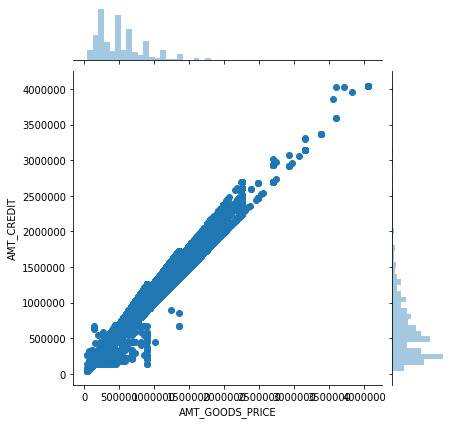

In [21]:
f = sns.jointplot(df_app["AMT_GOODS_PRICE"], df_app["AMT_CREDIT"])
f.set_xticklabels(rotation = 90)
plt.show()

#### Imputing by Mean and Graphical Method
AMT_GOODS_PRICE can be imputed by refering the joint plot of AMT_GOODS_PRICE and AMT_CREDIT, as they have a correlation
The reverse is also true.

AMT_REQ_CREDIT_BUREAU _YEAR -> Can be imputed by calculating mean, as it is a standalone without any link to another column.

### 1.3 Column DataType Change and Negative value to Positive value conversion

In [ ]:
pd.set_option("display.max_columns", 81)
df_app.head()


In [ ]:
df_app.info()

In [ ]:
Form the data set(df_app) observation above, the following column values can be changed to a positive metric

DAYS_BIRTH --> As a person is always born prior to seeking a loan and hence no need for the negative sign.


Form the data set observation above, the following columns can be changed from float to object
SK_ID_CURR
TARGET
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21



### Negative to Positive conversion

In [ ]:
#Converting negative DAYS_BIRTH to positive.

df_app["DAYS_BIRTH"] = df_app["DAYS_BIRTH"].abs() 

df_app["DAYS_BIRTH"].head()

In [ ]:
df_prev.head()

In [ ]:
df_prev.info()

Form the data set(df_prev) observation above, the following column values can be changed to a positive metric, 
it appears to be area code which need not be negative.

SELLERPLACE_AREA


Form the data set observation above, the following columns can be changed from float to object

SK_ID_PREV 
SK_ID_CURR
HOUR_APPR_PROCESS_START
SELLERPLACE_AREA
NFLAG_INSURED_ON_APPROVAL

### Negative to Positive conversion

In [ ]:
#Converting SELLERPLACE_AREA to positive
df_prev["SELLERPLACE_AREA"] = df_prev["SELLERPLACE_AREA"].abs() 

df_prev["SELLERPLACE_AREA"].head()

### Converting from float to ObjectType for df_prev dataframe

In [ ]:
cols = ["SK_ID_PREV", "SK_ID_CURR","HOUR_APPR_PROCESS_START","SELLERPLACE_AREA","NFLAG_INSURED_ON_APPROVAL"]
for x in cols:
    df_prev[x] = df_prev[x].astype(str)

In [ ]:
df_prev[["SK_ID_PREV", "SK_ID_CURR","HOUR_APPR_PROCESS_START","SELLERPLACE_AREA","NFLAG_INSURED_ON_APPROVAL"]].info()

### We can see above that, the data types have been converted from float to object.

### 1.4 Spotting Outliers

#Choosing the following numerical fields for spotting outliers
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
AMT_INCOME_TOTAL
CNT_FAM_MEMBERS
DAYS_BIRTH


<Figure size 432x288 with 0 Axes>

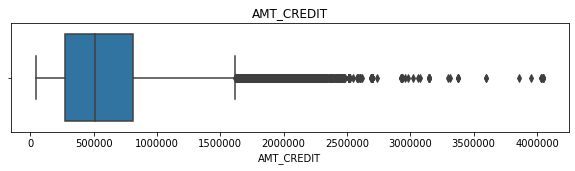

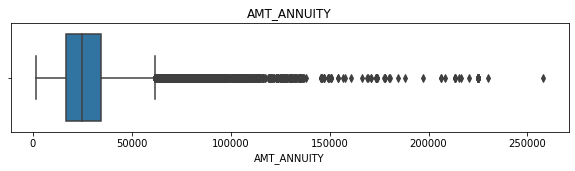

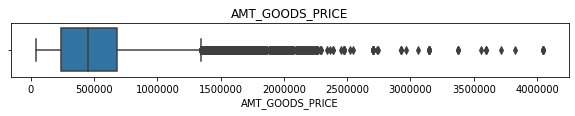

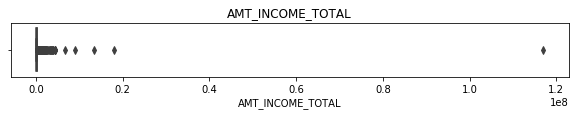

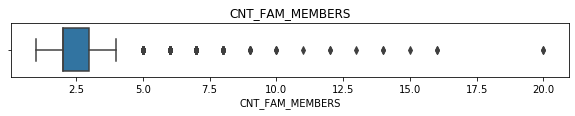

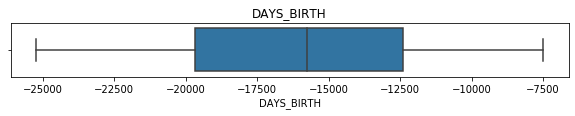

In [22]:
plt.figure(1)

plt.figure(figsize = (10,2))
plt.title("AMT_CREDIT")
sns.boxplot(df_app["AMT_CREDIT"])
plt.show()


plt.figure(figsize = (10,2))
plt.title("AMT_ANNUITY")
sns.boxplot(df_app["AMT_ANNUITY"])
plt.show()

plt.figure(figsize = (10,1))
plt.title("AMT_GOODS_PRICE")
sns.boxplot(df_app["AMT_GOODS_PRICE"])
plt.show()

plt.figure(figsize = (10,1))
plt.title("AMT_INCOME_TOTAL")
sns.boxplot(df_app["AMT_INCOME_TOTAL"])
plt.show()

plt.figure(figsize = (10,1))
plt.title("CNT_FAM_MEMBERS")
sns.boxplot(df_app["CNT_FAM_MEMBERS"])
plt.show()

plt.figure(figsize = (10,1))
plt.title("DAYS_BIRTH")
sns.boxplot(df_app["DAYS_BIRTH"])
plt.show()



### Outlier Observation
AMT_TOTAL_INCOME clearly has anoutlier.
CNT_FAM_MEMBERS has couple of outliers.
DAYS_BIRTH does not have any outliers
Other columns in the box plot, do have values above the whisker. However, we cant distinctly spot any outlier.

### 1.5 Binning

C:\Users\shilaksh\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\shilaksh\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\shilaksh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\shilaksh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


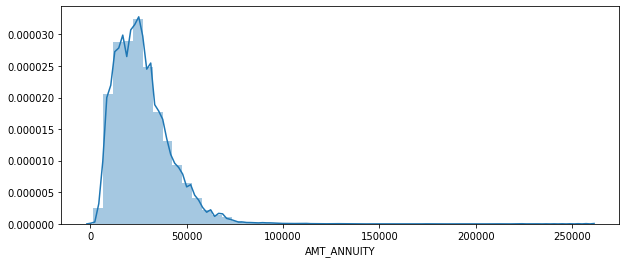

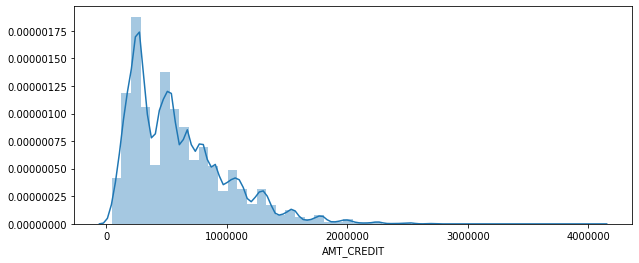

In [29]:
#Choosing AMT_CREDIT and AMT_ANNUITY for binning, as they have a reasonably broad distrubution that enables classification

plt.figure(figsize = (10,4))
sns.distplot(df_app["AMT_ANNUITY"], bins =50)
plt.show()

plt.figure(figsize = (10,4))
sns.distplot(df_app["AMT_CREDIT"], bins =50)
plt.show()


In [24]:
#Binning should not have too many bins nor too less, we can have the following
#AMT_CREDIT can have a class width of (Low, Moderate, High, Very High, Very Very High)
#Looking at the distribution of Credit, values from 0 to 2000000 needs to be into 3 categories. 
#The class interval can therefore be made 600,000

# Likewise, we can have for the annuity we get the class interval as 30,000

bin_credit = [0,600000,1200000,1800000,2400000,9000000] 
Title = ["Low", "Medium", "High","Very High", "Very Very High"]
df_app["CREDIT_SLAB"] = pd.cut(df_app.AMT_CREDIT, bin_credit, labels = Title)

bin_annuity = [0,30000,60000,90000,120000,9000000] 
Title = ["Low", "Medium", "High","Very High", "Very Very High"]
df_app["ANNUITY_SLAB"] = pd.cut(df_app.AMT_ANNUITY, bin_annuity, labels = Title)

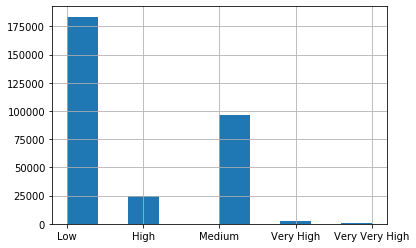

In [30]:
df_app["CREDIT_SLAB"].hist()
plt.show()

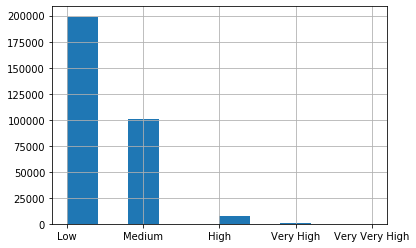

In [31]:
df_app["ANNUITY_SLAB"].hist()
plt.show()

### It can be seen above that, post binning, the values have got categorized into buckets viz Low, Medium, High etc.

## 2.0 Univariate Analysis - Unmerged dataset of df_app

In [27]:
#Preparing data set for default and non default cases
df_app_default = df_app.loc[df_app["TARGET"]==1]
df_app_nodefault = df_app.loc[df_app["TARGET"]==0]

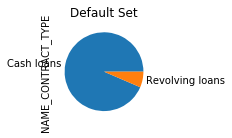

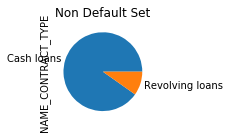

In [33]:
#Finding the proportion of loan category for default and non default cases

plt.subplot(1,3,1)
plt.title("Default Set")
(100*df_app_default.NAME_CONTRACT_TYPE.value_counts()/len(df_app_default.index)).plot(kind = "pie")
plt.show()

plt.subplot(1,3,3)
plt.title("Non Default Set")
(100*df_app_nodefault.NAME_CONTRACT_TYPE.value_counts()/len(df_app_nodefault.index)).plot(kind = "pie")
plt.show()



### It can be seen from above that, default in cash loans are the most and cash loans form the bulk of lending.
### Hence, we need to focus on the defaulting in this sector. 

### 2.1 Bivariate Analysis

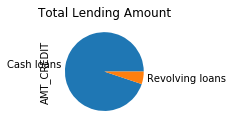

In [37]:
# Finding the total lending of both categories of loans.
plt.subplot(1,3,3)
plt.title("Total Lending Amount")
df_app.groupby("NAME_CONTRACT_TYPE")["AMT_CREDIT"].sum().plot(kind ="pie")
plt.show()

### We can also see from above that, the total lending of Cash loans far exceeds the Revolving loans.

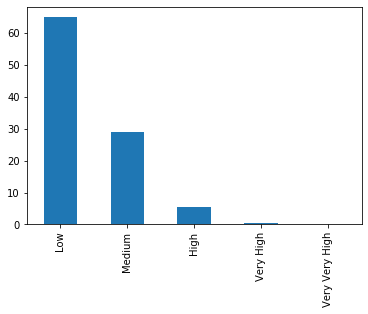

In [38]:
#Finding the category of borrowing, that had maximum default.
(100*df_app_default.CREDIT_SLAB.value_counts(normalize = True)).plot(kind ="bar")
plt.show()

### It can be seen from above that, Low borrowing and Medium borrowing together, form the bulk of borrowing and defaulting.

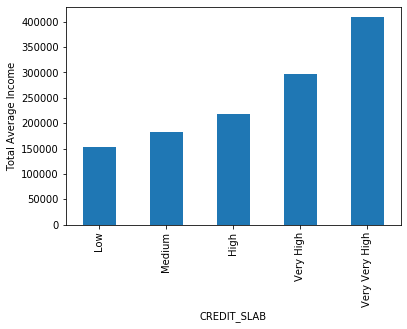

In [39]:
# Get the average income of people taking low and medium amount loans.
plt.ylabel("Total Average Income")
df_app_default.groupby("CREDIT_SLAB")["AMT_INCOME_TOTAL"].mean().plot(kind = "bar")
plt.show()

### It can be seen from above that, lower income people are taking lower amount loans in general.

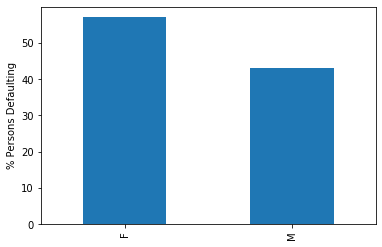

In [41]:
# Finding the proportion of male and female who have defaulted
plt.ylabel("% Persons Defaulting")
(100*df_app_default.CODE_GENDER.value_counts(normalize = True)).plot(kind = "bar")
plt.show()

### It can be seen that, females have defaulted 1.5 times more than male borrowers.

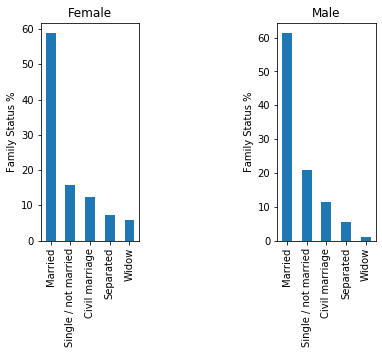

In [44]:
#Finding the Family status of the defaulters
plt.subplot(1,3,1)
plt.title("Female")
plt.ylabel("Family Status %")
(df_app_default[df_app_default["CODE_GENDER"] == "F"].NAME_FAMILY_STATUS.value_counts(normalize = True)*100).plot(kind = "bar")
#plt.show()

plt.subplot(1,3,3)
plt.title("Male")
plt.ylabel("Family Status %")
(df_app_default[df_app_default["CODE_GENDER"] == "M"].NAME_FAMILY_STATUS.value_counts(normalize = True)*100).plot(kind = "bar")
#plt.show()

### It can be seen from above that, bulk of defaulters are married.

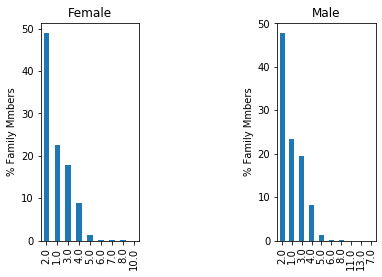

In [45]:
#Finding the family size of the defaulters

plt.subplot(1,3,1)
plt.title("Female")
plt.ylabel("% Family Mmbers")
(df_app_default[df_app_default["CODE_GENDER"] == "F"].CNT_FAM_MEMBERS.value_counts(normalize = True)*100).plot(kind = "bar")


plt.subplot(1,3,3)
plt.title("Male")
plt.ylabel("% Family Mmbers")
(df_app_default[df_app_default["CODE_GENDER"] == "M"].CNT_FAM_MEMBERS.value_counts(normalize = True)*100).plot(kind = "bar")


### It can be seen from above that, bulk are 2 member family ie those without children

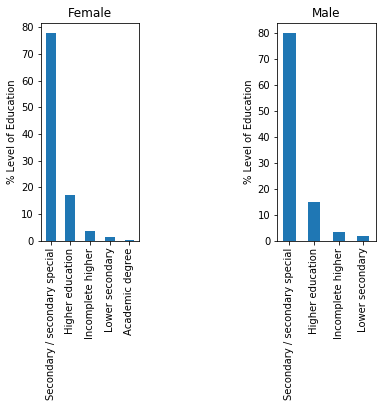

In [46]:
#Finding the education of the defaulters
plt.subplot(1,3,1)
plt.title("Female")
plt.ylabel("% Level of Education")
(df_app_default[df_app_default["CODE_GENDER"] == "F"].NAME_EDUCATION_TYPE.value_counts(normalize = True)*100).plot(kind = "bar")


plt.subplot(1,3,3)
plt.title("Male")
plt.ylabel("% Level of Education")
(df_app_default[df_app_default["CODE_GENDER"] == "M"].NAME_EDUCATION_TYPE.value_counts(normalize = True)*100).plot(kind = "bar")


### It is very clear from the above that, bulk of the defaulters are Secondary educated.

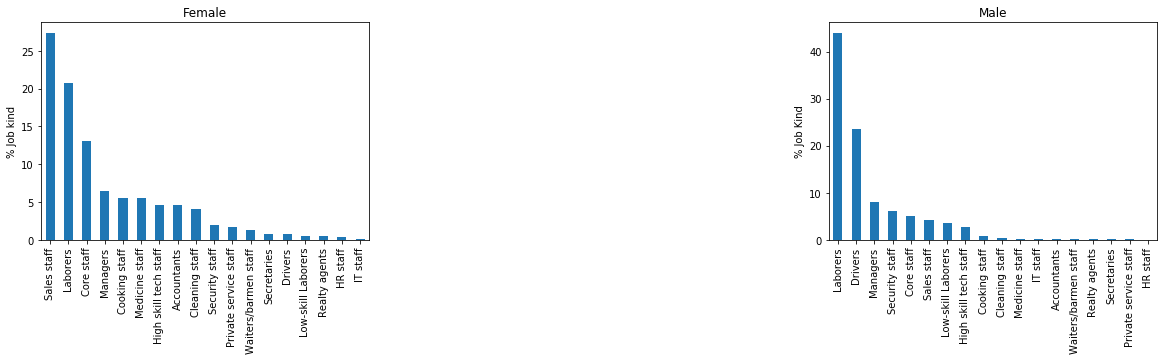

In [47]:
#Finding the job type of the defaulters
plt.figure(figsize = (20,4))

plt.subplot(1,3,1)
plt.title("Female")
plt.ylabel("% Job kind")
(df_app_default[df_app_default["CODE_GENDER"] == "F"].OCCUPATION_TYPE.value_counts(normalize = True)*100).plot(kind = "bar")


plt.subplot(1,3,3)
plt.title("Male")
plt.ylabel("% Job Kind")
(df_app_default[df_app_default["CODE_GENDER"] == "M"].OCCUPATION_TYPE.value_counts(normalize = True)*100).plot(kind = "bar")


### Apart from the ladies sales staff, labour class of men and women and driver class of men, seem to form the bulk of defaulters.

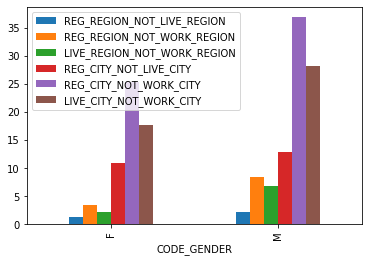

In [48]:
# Finding the address furnishing for male and female defaulters.

(100*(df_app_default.groupby("CODE_GENDER")["REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY"].mean())).plot(kind ="bar")


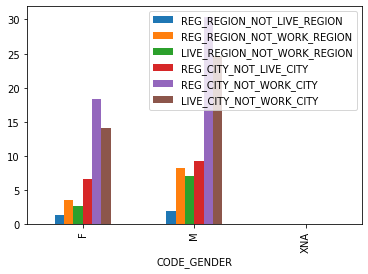

In [49]:
#Finding the address furnishing for male and female for non defaulters
(100*(df_app_nodefault.groupby("CODE_GENDER")["REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY"].mean())).plot(kind ="bar")

### It can be seen from above that, the address furnishing is similar for defaulting and non defaulting cases and hence the discrepancy in furnishing of address is not the prime reason for defaulting.

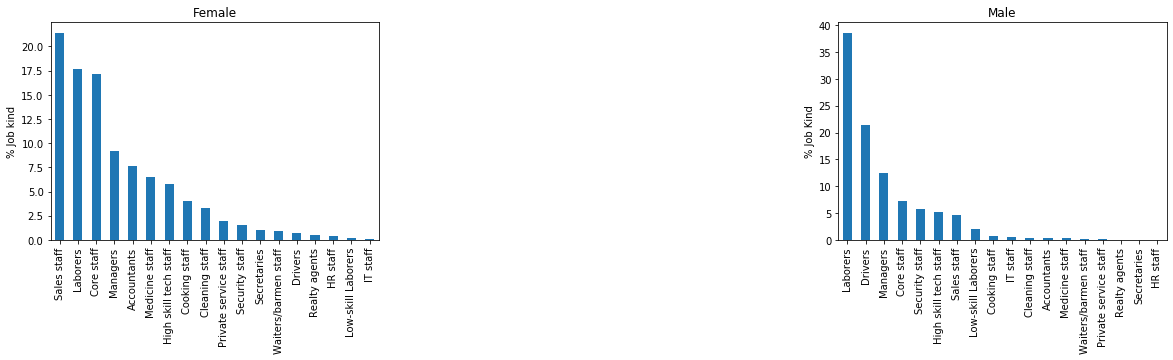

In [50]:
#Finding the job type of the non defaulters
plt.figure(figsize = (20,4))

plt.subplot(1,3,1)
plt.title("Female")
plt.ylabel("% Job kind")
(df_app_nodefault[df_app_nodefault["CODE_GENDER"] == "F"].OCCUPATION_TYPE.value_counts(normalize = True)*100).plot(kind = "bar")


plt.subplot(1,3,3)
plt.title("Male")
plt.ylabel("% Job Kind")
(df_app_nodefault[df_app_nodefault["CODE_GENDER"] == "M"].OCCUPATION_TYPE.value_counts(normalize = True)*100).plot(kind = "bar")


### Comparing the occupation profile of defaulters and non defaulters, we can infer that, reduction of labour class, drivers and sales (female), improves timely payments.

In [61]:
#Finding the number of children of non defaulters

print(df_app_nodefault["CNT_CHILDREN"].mean())
print(df_app_default["CNT_CHILDREN"].mean())



0.41294581266847313
0.46380664652567977


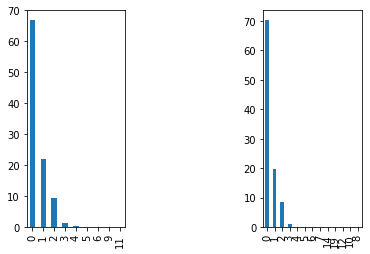

In [52]:
#Finding the number of children for defaulters and non defaulters

plt.subplot(1,3,1)
(df_app_default.CNT_CHILDREN.value_counts(normalize = True)*100).plot(kind = "bar")


plt.subplot(1,3,3)
(df_app_nodefault.CNT_CHILDREN.value_counts(normalize = True)*100).plot(kind = "bar")



### From the above, we can conclude that the number of children profile is nearly alike and hence not a contributor to defaulting.

In [53]:
#Credit bureau checks.
print((df_app_nodefault[["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]].mean()).sum())
print((df_app_default[["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]].mean()).sum())

2.4734436300970835
2.566259192519359


### From the above, we can conclude that the Credit Bureau check was not so significant to know if it lead to defaulting.

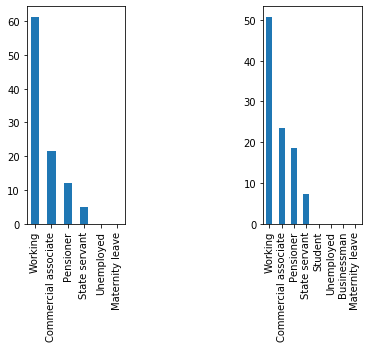

In [54]:
#Probing the income source
plt.subplot(1,3,1)
(df_app_default.NAME_INCOME_TYPE.value_counts(normalize = True)*100).plot(kind = "bar")


plt.subplot(1,3,3)
(df_app_nodefault.NAME_INCOME_TYPE.value_counts(normalize = True)*100).plot(kind = "bar")


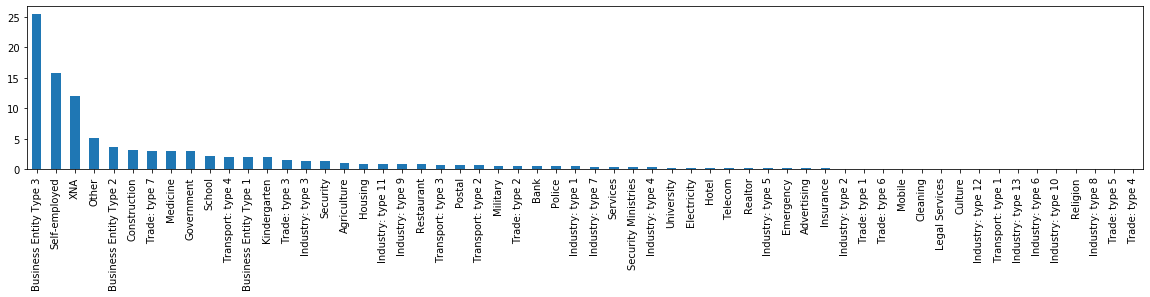

In [72]:
#Probing the work organisation 
 
plt.figure(figsize = (20,3))

(df_app_default.ORGANIZATION_TYPE.value_counts(normalize = True)*100).plot(kind = "bar")
plt.show()




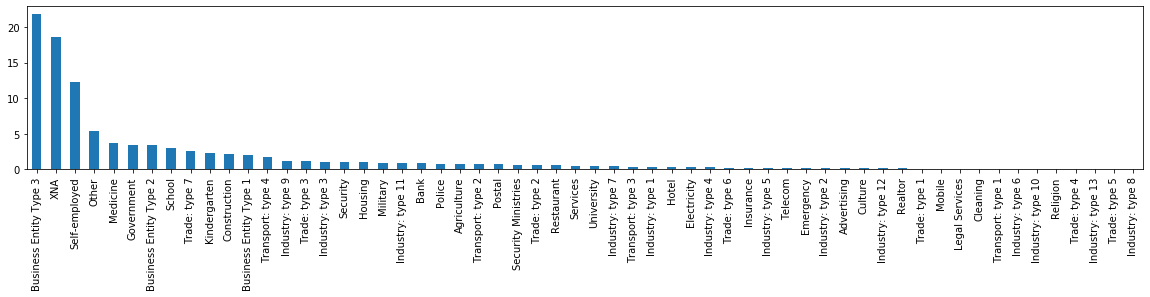

In [70]:
plt.figure(figsize = (20,3))
(df_app_nodefault.ORGANIZATION_TYPE.value_counts(normalize = True)*100).plot(kind = "bar")
plt.show()


In [56]:
print(df_app_default.ORGANIZATION_TYPE.value_counts(normalize = True)*100)



Business Entity Type 3    25.470292
Self-employed             15.742195
XNA                       12.044310
Other                      5.135952
Business Entity Type 2     3.625378
Construction               3.162135
Trade: type 7              2.980866
Medicine                   2.968781
Government                 2.924471
School                     2.118832
Transport: type 4          2.018127
Business Entity Type 1     1.961732
Kindergarten               1.949648
Trade: type 3              1.454179
Industry: type 3           1.401813
Security                   1.305136
Agriculture                1.035247
Housing                    0.946626
Industry: type 11          0.942598
Industry: type 9           0.906344
Restaurant                 0.853978
Transport: type 3          0.753273
Postal                     0.733132
Transport: type 2          0.692850
Military                   0.543807
Trade: type 2              0.535750
Bank                       0.523666
Police                     0

In [57]:
print(df_app_nodefault.ORGANIZATION_TYPE.value_counts(normalize = True)*100)

Business Entity Type 3    21.815371
XNA                       18.530808
Self-employed             12.205769
Other                      5.450571
Medicine                   3.698804
Government                 3.423587
Business Entity Type 2     3.414743
School                     2.959821
Trade: type 7              2.508437
Kindergarten               2.262581
Construction               2.099856
Business Entity Type 1     1.944560
Transport: type 4          1.732311
Industry: type 9           1.111834
Trade: type 3              1.107589
Industry: type 3           1.036486
Security                   1.034009
Housing                    0.963260
Military                   0.884020
Industry: type 11          0.873761
Bank                       0.840862
Police                     0.786739
Agriculture                0.777187
Transport: type 2          0.718819
Postal                     0.698655
Security Ministries        0.664341
Trade: type 2              0.625075
Restaurant                 0

In [58]:
# Getting average income of each profession
df_app.groupby("ORGANIZATION_TYPE")["AMT_INCOME_TOTAL"].mean()

ORGANIZATION_TYPE
Advertising               203919.230769
Agriculture               143024.492054
Bank                      199308.171719
Business Entity Type 1    186195.135862
Business Entity Type 2    170854.997664
Business Entity Type 3    190057.659812
Cleaning                  154220.192308
Construction              200227.861553
Culture                   174009.300792
Electricity               172648.781053
Emergency                 184712.938393
Government                160790.739935
Hotel                     158304.484472
Housing                   159420.249493
Industry: type 1          173310.119827
Industry: type 10         198454.128440
Industry: type 11         162680.525148
Industry: type 12         187659.560976
Industry: type 13         147915.671642
Industry: type 2          171449.253275
Industry: type 3          148759.136714
Industry: type 4          178382.216648
Industry: type 5          174979.224541
Industry: type 6          171212.946429
Industry: type 7      

### We can also conclude from above that, Business Type3 and Self employeed do fall under Low to Medium income group, which also is the bulk of the defaulters. Thus, due to business risk and inconsistent income, they could be defaulting more.

In [59]:
df_app_default[df_app_default["OCCUPATION_TYPE"].isin(["Sales staff","Laborers","Drivers"])].groupby("OCCUPATION_TYPE")["ORGANIZATION_TYPE"].value_counts()

OCCUPATION_TYPE  ORGANIZATION_TYPE     
Drivers          Business Entity Type 3    630
                 Self-employed             564
                 Transport: type 3         151
                 Transport: type 4         129
                 Other                      88
                                          ... 
Sales staff      Security Ministries         1
                 Telecom                     1
                 Trade: type 6               1
                 Transport: type 2           1
                 Transport: type 3           1
Name: ORGANIZATION_TYPE, Length: 145, dtype: int64

In [60]:
df_app_nodefault[df_app_nodefault["OCCUPATION_TYPE"].isin(["Sales staff","Laborers","Drivers"])].groupby("OCCUPATION_TYPE")["ORGANIZATION_TYPE"].value_counts()

OCCUPATION_TYPE  ORGANIZATION_TYPE     
Drivers          Business Entity Type 3    4845
                 Self-employed             3615
                 Transport: type 4         1071
                 Other                      858
                 Transport: type 3          809
                                           ... 
Sales staff      Cleaning                     3
                 University                   3
                 Emergency                    2
                 Industry: type 10            1
                 Industry: type 13            1
Name: ORGANIZATION_TYPE, Length: 166, dtype: int64

### We can see that, the defaulters do belong to Business Type3, Self employeed and the un-categorised labourers.

## Key Highlights of Analysis from the current applications dataset

1. Bulk of default is Cash Loans.
2. Cash Loans form the bulk of lending by way of Total Exposure to bank and also by way of volume.

3. From point 1 and 2, we can conclude that we need to focus on the Cash Loans defaulting.

4. Low and Medium borrowing form the bulk of borrowing and defaulting.

5. Low and Medium amount borrowing are happening in low and medium income groups.

6. Females have defaulted 1.5 times more than males.

7. The majority of defaulters are married without kids (2 family members).

8. The majority of defaulters are Secondary educated.

9. Majority of defaulters are Labourers, Drivers and ales staff(females).

10. Number of children, address mismatch and Bureau queries are not impacting the defaulting.

11. Business Type 3 and Self employeed persons and labourers form the highest number of defaulters.


Summary

Divers (Business Type 3), 
Self employeed(usually uncertain income) 
labourers(un organised as they are not under any organisation category)

Above seems to suggest that, uncertain income seems to be to cause for defaulting.



